In [6]:
### Q1: Key Features of the Wine Quality Data Set

# The wine quality dataset typically includes the following features:
# 1. Fixed acidity: Acids contribute to the wine's taste.
# 2. Volatile acidity: High levels of volatile acidity can lead to an unpleasant, vinegar taste.
# 3. Citric acid: Acts as a preservative and adds freshness.
# 4. Residual sugar: The amount of sugar remaining after fermentation. Higher levels can make the wine taste sweeter.
# 5. Chlorides: Can affect the wine's taste and preservation.
# 6. Free sulfur dioxide: Prevents microbial growth and oxidation.
# 7. Total sulfur dioxide: Combination of free and bound sulfur dioxide; too much can cause unpleasant odors.
# 8. Density: Can be related to the alcohol and sugar content.
# 9. pH: Indicates the acidity/basicity of the wine.
# 10. Sulphates: Adds to the wine's stability and enhances flavor.
# 11. Alcohol: The percentage of alcohol can affect the wine's body and taste.
# 12. Quality: The target variable, usually rated on a scale (e.g., 0-10).

# Importance in Predicting Quality:
# - Acidity (fixed, volatile, and citric) influences taste and preservation.
# - Residual sugar affects sweetness.
# - Chlorides, sulfur dioxide, and sulphates impact preservation and flavor.
# - Density, pH, and alcohol levels contribute to the wine's balance and overall experience.
# Describe the wine data
wine_data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.stats import skew, boxcox

# Load datasets
wine_data = pd.read_csv('winequality-red.csv')
student_data = pd.read_csv('stud.csv')

# Display the first few rows of the wine data
print(wine_data.head())
print('\n')
# Display the first few rows of the student data
print(student_data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
### Q2: Handling Missing Data in the Wine Quality Data Set
'''
Techniques for Handling Missing Data:
1. Removal: If the dataset is large and only a few entries are missing.
   - Advantages: Simple and preserves the original distribution of other features.
   - Disadvantages: Loss of information.
2. Mean/Median Imputation: Replacing missing values with the mean or median.
   - Advantages: Maintains dataset size.
   - Disadvantages: Can distort variance and relationships.
3. Mode Imputation: Replacing missing values with the mode for categorical variables.
   - Advantages: Simple for categorical data.
   - Disadvantages: Can introduce bias.
4. Predictive Imputation: Using machine learning models to predict missing values.
   - Advantages: Can preserve relationships between features.
   - Disadvantages: Complex and computationally intensive.
'''
# Check for missing values
missing_values = wine_data.isnull().sum()
print(missing_values)

# If missing values exist, we will impute them using different techniques

# Mean imputation
mean_imputer = SimpleImputer(strategy='mean')
wine_data_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(wine_data), columns=wine_data.columns)

# Median imputation
median_imputer = SimpleImputer(strategy='median')
wine_data_median_imputed = pd.DataFrame(median_imputer.fit_transform(wine_data), columns=wine_data.columns)

# Mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
wine_data_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(wine_data), columns=wine_data.columns)

# Display imputed datasets (example: mean imputation)
print(wine_data_mean_imputed.head())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.2

/tmp/ipykernel_687/1965697262.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = student_data.corr()


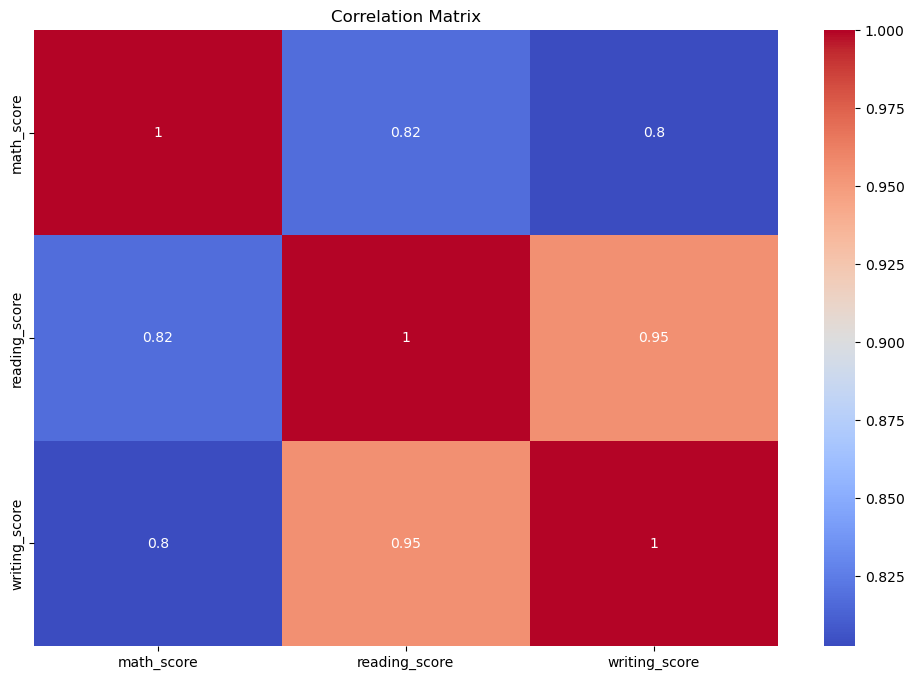

                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     500.3
Date:                Thu, 01 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:42:24   Log-Likelihood:                -3090.7
No. Observations:                1000   AIC:                             6211.
Df Residuals:                     985   BIC:                             6285.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [7]:
### Q3: Key Factors Affecting Students' Performance in Exams
'''
Potential Factors:
- Study time: Amount of time dedicated to studying.
- Attendance: Regularity in attending classes.
- Parental involvement: Engagement of parents in the student's education.
- Socioeconomic status: Family income and resources.
- Teacher effectiveness: Quality of teaching.
- Learning environment: Availability of study materials and conducive study spaces.

Analyzing Factors Using Statistical Techniques:
- Correlation Analysis: To find relationships between variables.
- Regression Analysis: To predict performance based on factors.
- ANOVA: To compare performance across different groups (e.g., different schools or teaching methods).
'''

# Descriptive statistics for student data
student_data.describe()

# Correlation matrix to identify relationships between scores and other factors
correlation_matrix = student_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression analysis to predict performance based on factors
import statsmodels.api as sm

# Define the target variable (e.g., math_score) and features
target = 'math_score'
X = student_data.drop([target], axis=1)
y = student_data[target]

# Handle categorical variables
X = pd.get_dummies(X, drop_first=True)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


In [8]:
### Q4: Feature Engineering in Student Performance Data Set

# Feature Selection and Transformation:
# 1. Selection:
#    - Choose features based on domain knowledge and correlation analysis.
# 2. Transformation:
#    - Normalize/Standardize numerical features.
#    - Encode categorical variables using one-hot encoding or label encoding.
#    - Create interaction terms if certain combinations of features are important.

# Normalize/Standardize numerical features
numerical_features = student_data.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
student_data[numerical_features] = scaler.fit_transform(student_data[numerical_features])

# Encode categorical variables
categorical_features = student_data.select_dtypes(include=[object]).columns
student_data = pd.get_dummies(student_data, columns=categorical_features, drop_first=True)

# Display transformed data
print(student_data.head())


   math_score  reading_score  writing_score  gender_male  \
0    0.390024       0.193999       0.391492            0   
1    0.192076       1.427476       1.313269            0   
2    1.577711       1.770109       1.642475            0   
3   -1.259543      -0.833899      -1.583744            1   
4    0.653954       0.605158       0.457333            1   

   race_ethnicity_group B  race_ethnicity_group C  race_ethnicity_group D  \
0                       1                       0                       0   
1                       0                       1                       0   
2                       1                       0                       0   
3                       0                       0                       0   
4                       0                       1                       0   

   race_ethnicity_group E  parental_level_of_education_bachelor's degree  \
0                       0                                              1   
1                       

In [ ]:
### Q5: Exploratory Data Analysis (EDA) on the Wine Quality Data Set

# Steps:
# 1. Load the Dataset: 
# import pandas as pd
# wine_data = pd.read_csv('work/stud.csv')
   

# 2. Distribution Analysis:
# import matplotlib.pyplot as plt
# wine_data.hist(bins=30, figsize=(15, 10))
# plt.show()
   
# 3. Identify Non-Normal Features:
#    - Use skewness and kurtosis metrics.
#    - Visual inspection via histograms and Q-Q plots.

# 4. Transformations:
#    - Log transformation for skewed data.
#    - Box-Cox transformation to stabilize variance.

# Histograms for all features
wine_data.hist(bins=30, figsize=(15, 10))
plt.show()

# Check skewness
skewness = wine_data.apply(lambda x: skew(x.dropna()))
print(skewness)

# Apply Box-Cox transformation to skewed features
for column in wine_data.columns:
    if skewness[column] > 1:
        wine_data[column], _ = boxcox(wine_data[column] + 1)  # Add 1 to handle zero values

# Histograms after transformation
wine_data.hist(bins=30, figsize=(15, 10))
plt.show()


In [ ]:
### Q6: Principal Component Analysis (PCA) on the Wine Quality Data Set

Performing PCA:
1. Standardize the Data:
   
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   wine_scaled = scaler.fit_transform(wine_data.drop('quality', axis=1))
   

2. PCA Calculation:
   
   from sklearn.decomposition import PCA
   pca = PCA(n_components=0.90)  # To explain 90% variance
   wine_pca = pca.fit_transform(wine_scaled)
   

3. Explained Variance:
   
   explained_variance = pca.explained_variance_ratio_
   cumulative_variance = explained_variance.cumsum()
   print(cumulative_variance)
   

   Determine the number of components where cumulative variance exceeds 90%.